# College Football Data EDA

In [1]:
#import packages
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../../Data/model-data/model_data.csv', index_col = 0)

df.head(5)


,Team,Year,Week,Win,Team H/A/N,Opponent,Team Conference,Opponent Conference,Team Past 10 Winning Pct,Opponent Past 10 Winning Pct,...,"Opponent Corporate Sponsorship, Advertising, Licensing",Opponent Donor Contributions,Opponent Competition Guarantees,Opponent Ticket Sales,Team Same Coach,Opponent Same Coach,Team Recruiting Rank Avg Past 4 Years,Opponent Recruiting Rank Avg Past 4 Years,Team Roster Changes,Opponent Roster Changes
0,TCU,2011,2,1,A,Air Force,MWC,MWC,0.5000,0.0000,...,729850.0,802526.0,786000.0,4111024.0,1.0,1.0,76.00,95.0,36.0,31.0
1,Navy,2011,5,0,H,Air Force,Ind.,MWC,0.3333,0.5000,...,729850.0,802526.0,786000.0,4111024.0,1.0,1.0,100.00,95.0,29.0,31.0
2,Notre Dame,2011,6,1,H,Air Force,Ind.,MWC,0.6667,0.3333,...,729850.0,802526.0,786000.0,4111024.0,1.0,1.0,13.75,95.0,34.0,31.0
3,San Diego State,2011,7,1,A,Air Force,MWC,MWC,0.6000,0.2500,...,729850.0,802526.0,786000.0,4111024.0,0.0,1.0,88.75,95.0,17.0,31.0
4,Boise State,2011,8,1,H,Air Force,MWC,MWC,1.0000,0.2000,...,729850.0,802526.0,786000.0,4111024.0,1.0,1.0,69.50,95.0,26.0,31.0


## Wins By Conference

### Total Wins by Conference

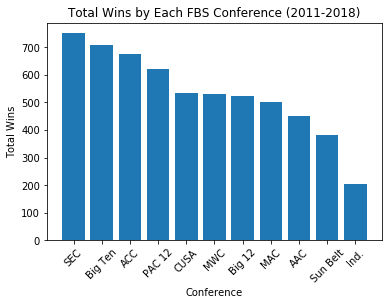

In [3]:
#wins by conference
dfPlt = df.groupby('Team Conference')['Win'].sum().\
                                             reset_index(name ='Total Wins').\
                                             sort_values('Total Wins', ascending = False)


plt.bar(x = dfPlt['Team Conference'], height = dfPlt['Total Wins'])
plt.title('Total Wins by Each FBS Conference (2011-2018)')
plt.xlabel('Conference')
plt.ylabel('Total Wins')
plt.xticks(rotation=45)
plt.show()

### Total Yearly Wins by Conference

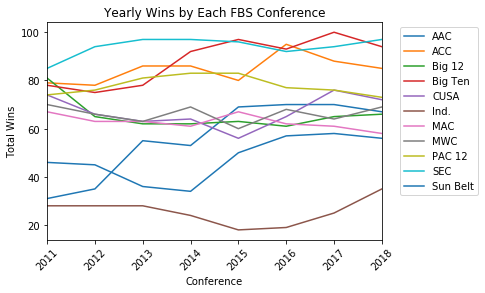

In [4]:
#wins by conference by year
dfPlt = df.groupby(['Team Conference', 'Year'])['Win'].sum().\
                                             reset_index(name ='Total Wins').\
                                             sort_values('Year', ascending = False)


grouped = dfPlt.groupby(['Team Conference'])
fig, ax = plt.subplots()
for key, group in grouped:
    group.plot('Year', 'Total Wins', label=key, ax=ax)

plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")



plt.title('Yearly Wins by Each FBS Conference')
plt.xlabel('Conference')
plt.ylabel('Total Wins')
plt.xticks(rotation=45)
plt.show()

### Winning Percentage by Conference

In [5]:
dfPlt = df.groupby(['Team Conference']).\
           agg({'Win': ['sum','count']}).\
           reset_index()

#remove multi indexing
dfPlt.columns = list(map(''.join, dfPlt.columns.values))

#rename columns
dfPlt = dfPlt.rename(columns = {'Winsum': 'Total Wins', 'Wincount': 'Number of Games'})

#Win Pct column
dfPlt['Win Pct'] = dfPlt['Total Wins']/dfPlt['Number of Games']

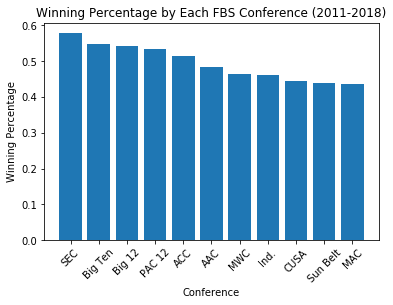

In [6]:
#order results to make graph more readable
dfPlt = dfPlt.sort_values('Win Pct', ascending = False)
#plot results
plt.bar(x = dfPlt['Team Conference'], height = dfPlt['Win Pct'])
#title
plt.title('Winning Percentage by Each FBS Conference (2011-2018)')
#labels
plt.xlabel('Conference')
plt.ylabel('Winning Percentage')
#make axis readable
plt.xticks(rotation=45)
#show
plt.show()

In [ ]:
df = df.sort_values(['Year', 'Week'], ascending = True)

